In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
sns.set_theme(palette='Set2')

In [4]:
import kagglehub

path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [5]:
df = pd.read_csv(f'{path}/Iris.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.Species.replace({ s: i for i, s in enumerate(df.Species.unique()) }, inplace=True) # maps species to numeric values

/tmp/ipython-input-1837966720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Species.replace({ s: i for i, s in enumerate(df.Species.unique()) }, inplace=True) # maps species to numeric values
/tmp/ipython-input-1837966720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Species.replac

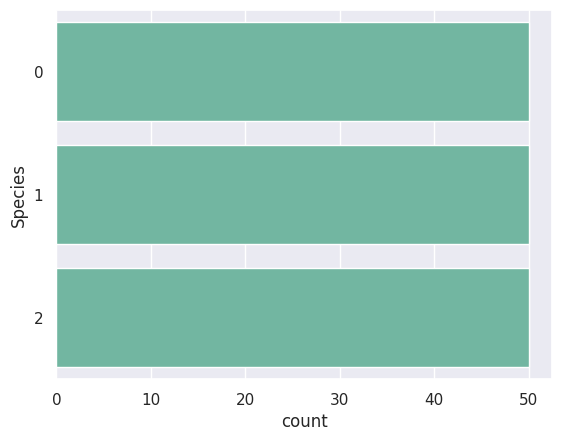

In [10]:
sns.countplot(y=df.Species, data=df)
plt.show()

In [11]:
df.drop(columns=['Id'], inplace=True)

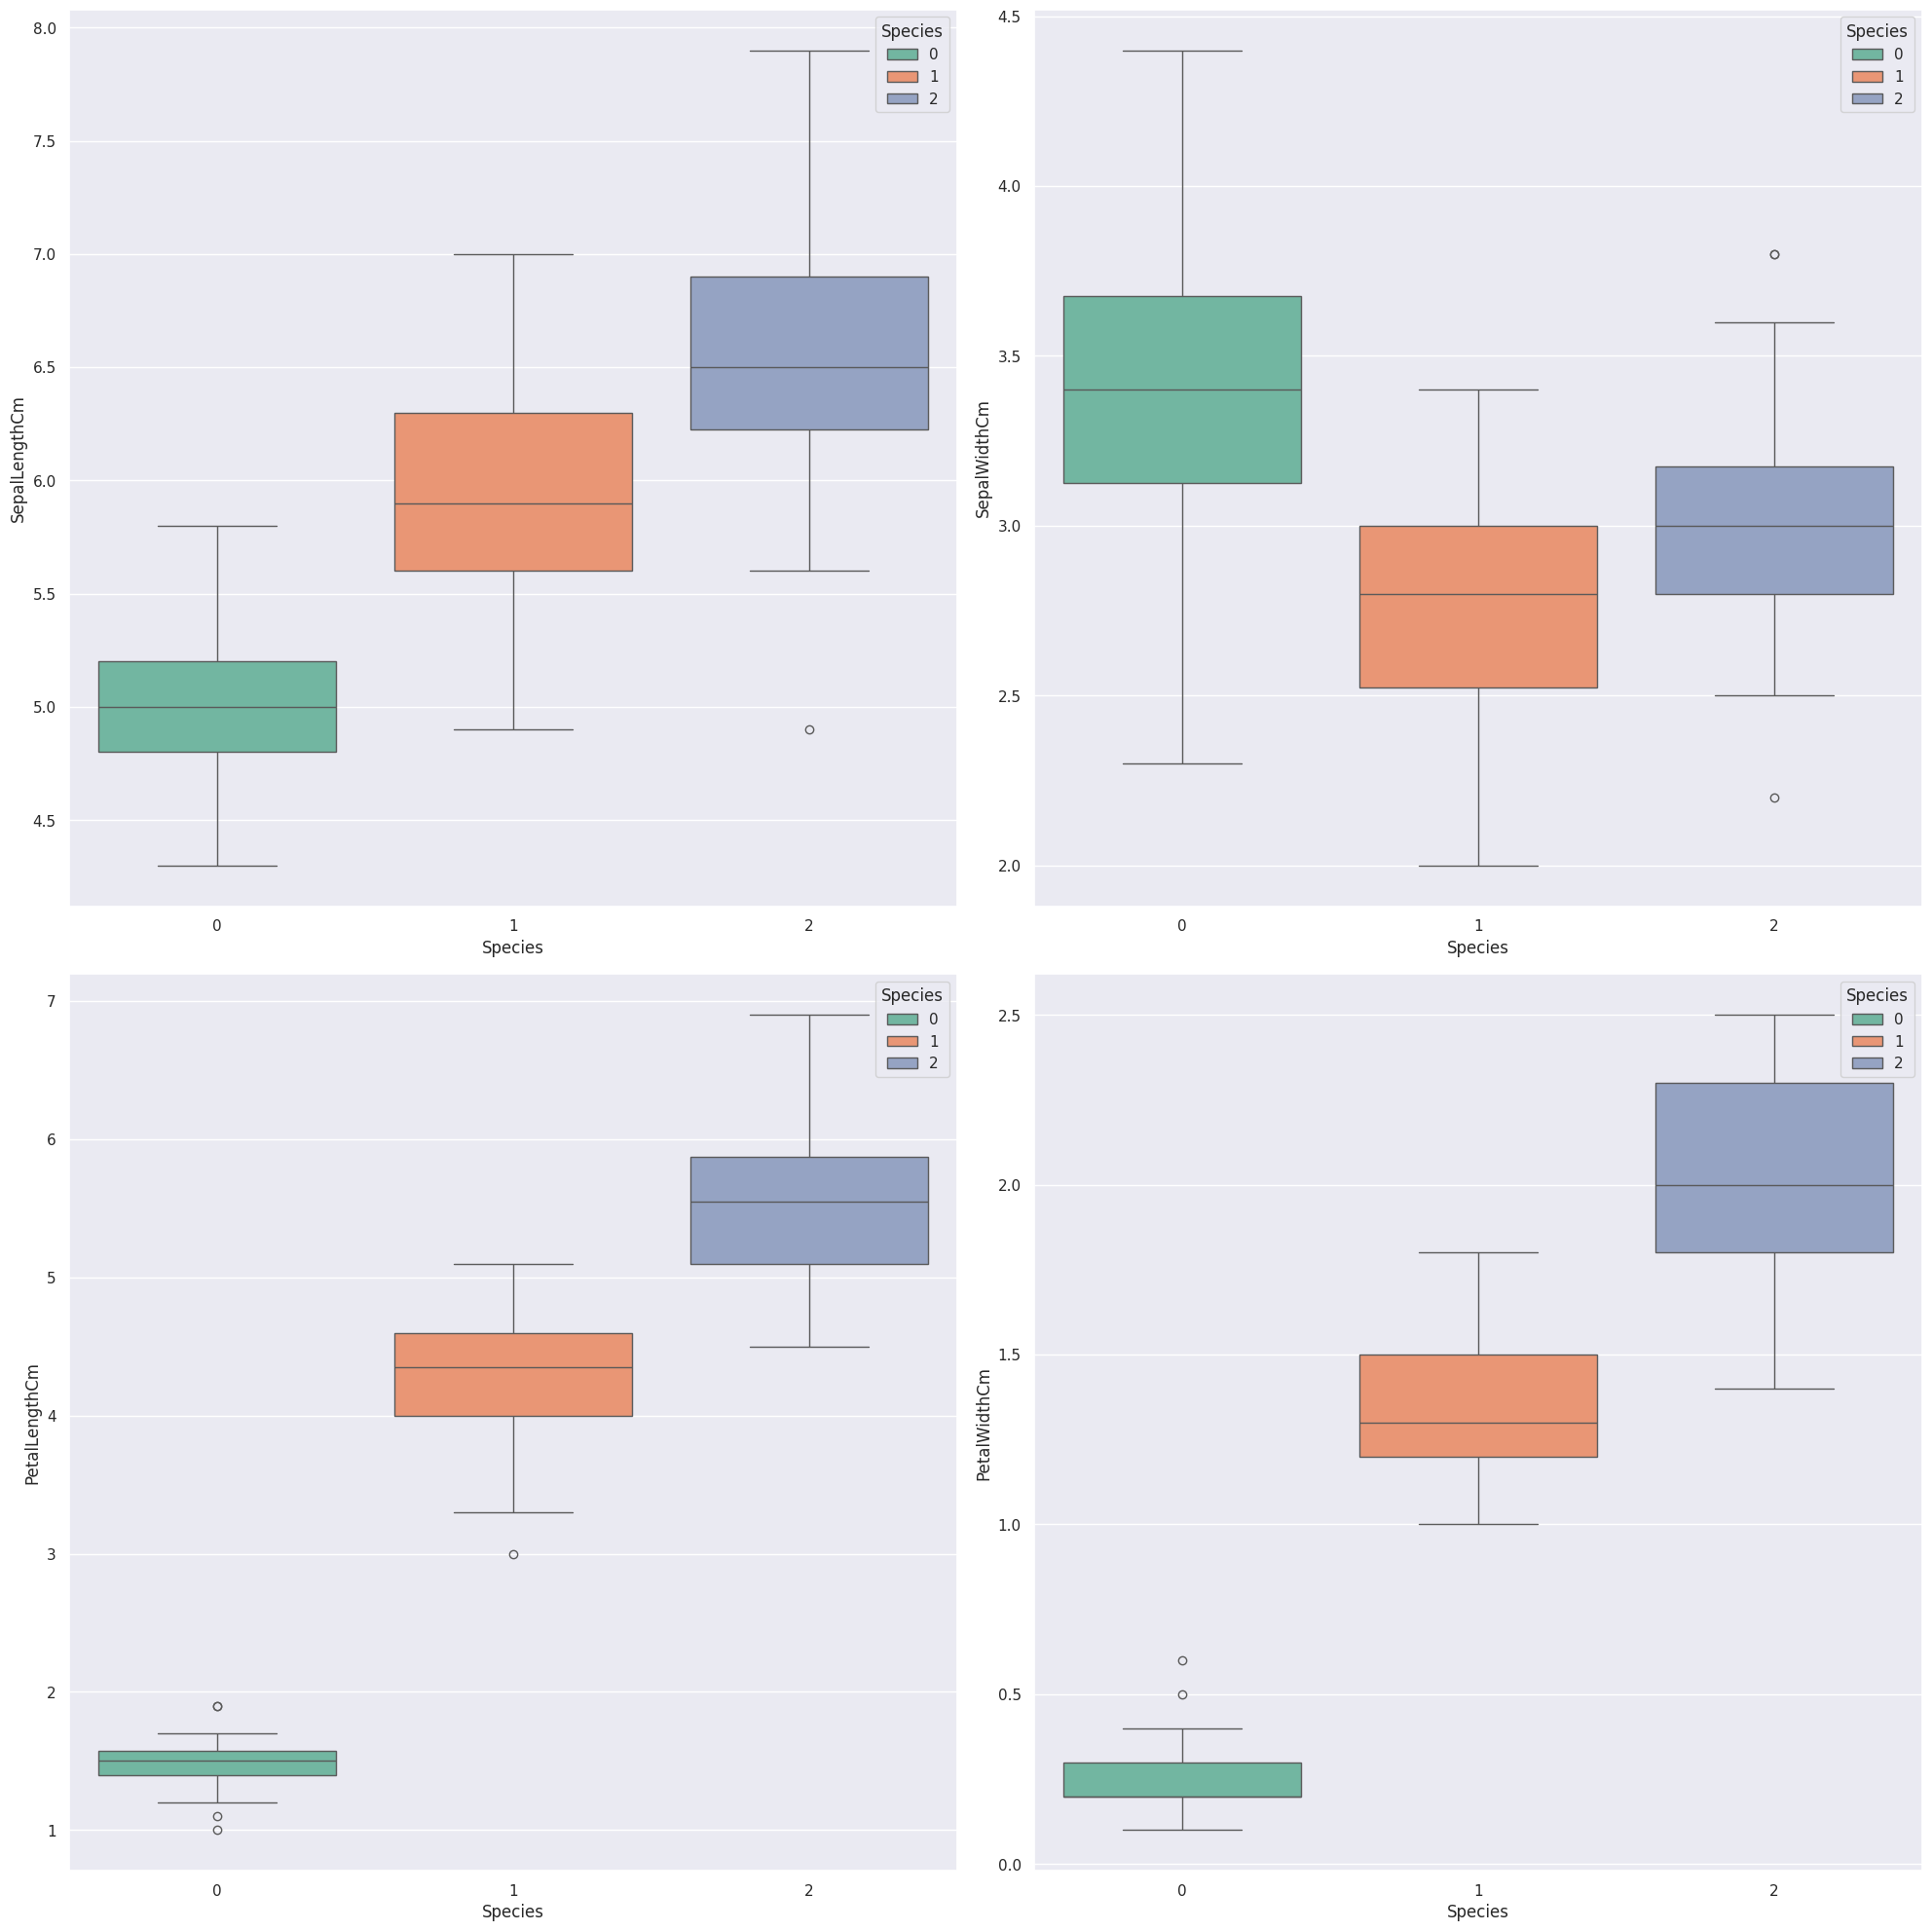

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20) )
axes = axes.flatten()
cols = df.columns.drop('Species')

for i, col in enumerate(cols):
  ax = axes[i]
  sns.boxplot(data=df, y=col, x='Species', ax=ax, hue='Species', palette="Set2")

plt.tight_layout()
plt.show()

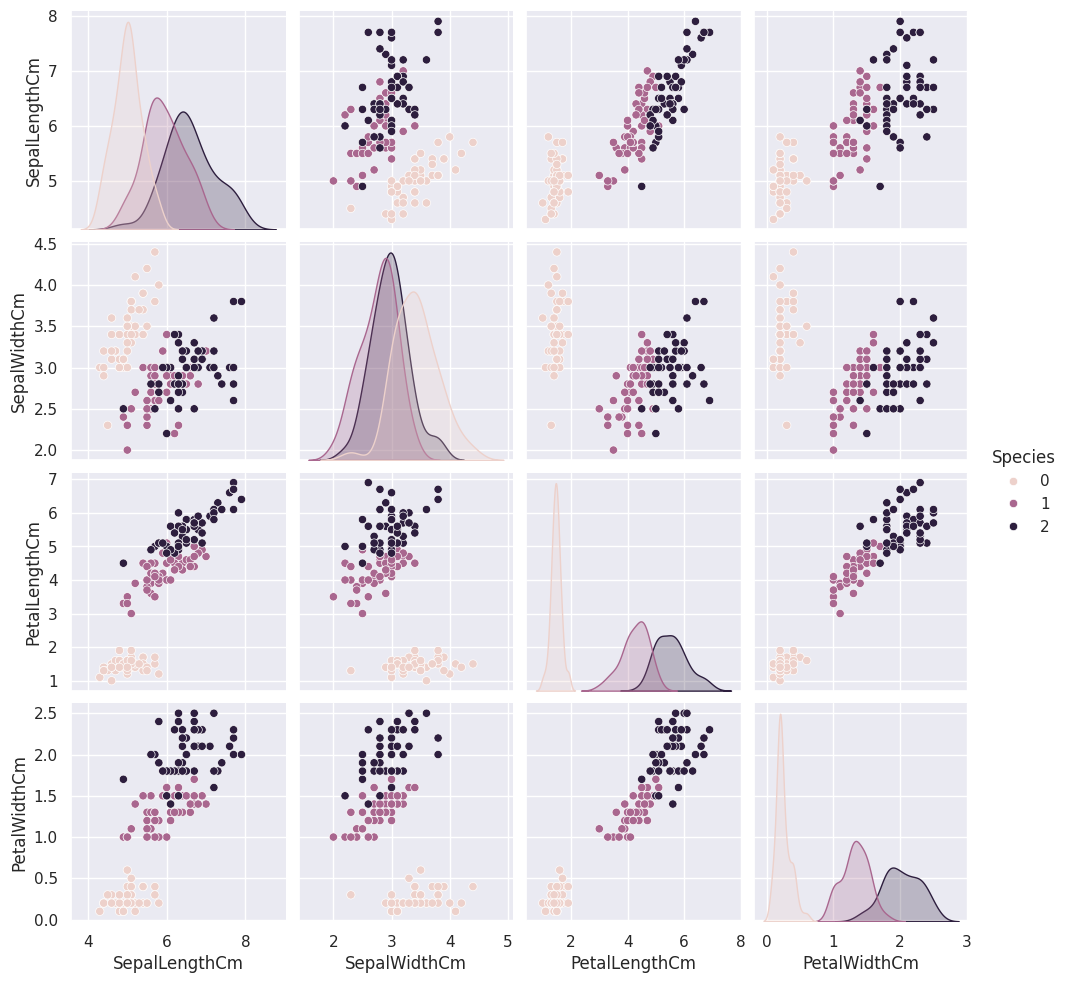

In [13]:
sns.pairplot(df, hue='Species')
plt.show()

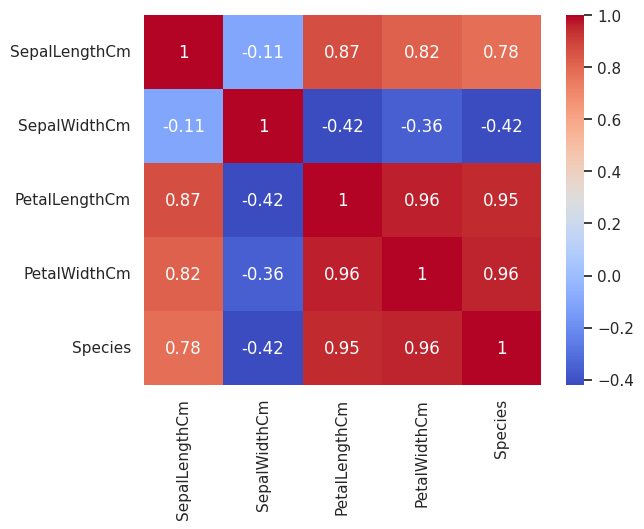

In [14]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

plt.show()

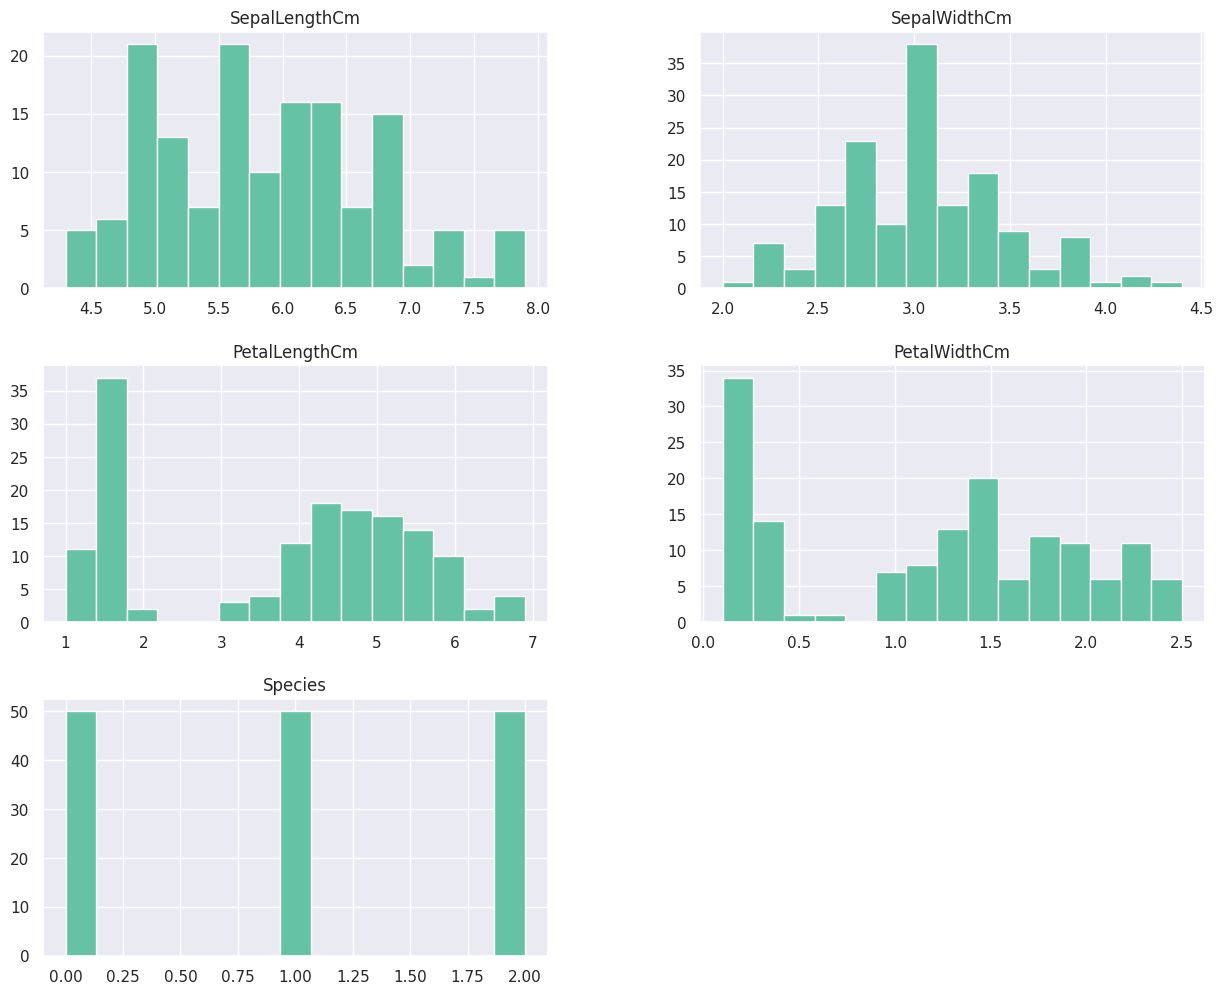

In [15]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()


In [16]:
y = df.Species
X = df.drop(columns='Species')

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print(f"Train score {knn.score(X_train, y_train)}")
print(f"Test score {knn.score(X_test, y_test)}")

Train score 0.9666666666666667
Test score 0.9666666666666667


In [25]:
pca = PCA()
X_new = pca.fit_transform(X)

In [41]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [45]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

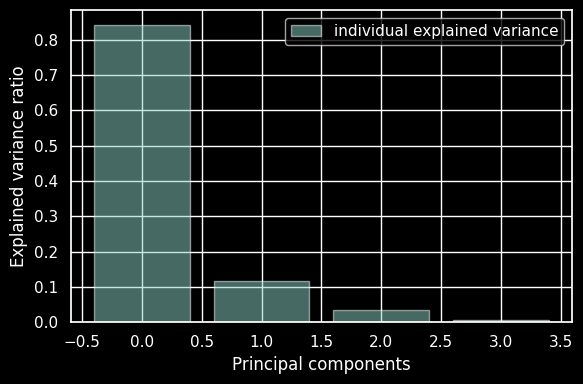

In [47]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [48]:
pca = PCA(n_components=3)

In [49]:
X_pca_3 = pca.fit_transform(X)

In [53]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474, 0.03490564])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42, stratify=y)

In [58]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print(f"Train score for PCA {knn.score(X_train, y_train)}")
print(f"Test score for PCA {knn.score(X_test, y_test)}")

Train score for PCA 0.9732142857142857
Test score for PCA 0.9473684210526315
